In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
dataset = pd.read_csv(r"spam_ham_dataset.csv")

In [35]:
dataset.columns #Index(['text', 'spam'], dtype='object')

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [36]:
dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [37]:
dataset.shape

(5171, 4)

In [38]:
#Checking for duplicates and removing them
dataset.drop_duplicates(inplace = True)
#Checking for any null entries in the dataset
print (pd.DataFrame(dataset.isnull().sum()))

            0
Unnamed: 0  0
label       0
text        0
label_num   0


In [39]:
dataset.shape  #(5728, 2)

(5171, 4)

In [47]:
dataset.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


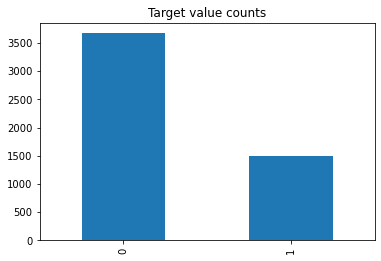

In [48]:
#Bivariate analysis

value_counts = dataset['label_num'].value_counts()
value_counts.plot.bar(title = 'Target value counts')

In [40]:
#Using Natural Language Processing to cleaning the text to make one corpus
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lynx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
dataset['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [42]:
#dataset['text'][0]=dataset['text'][0][9:]
dataset['text']=dataset['text'].map(lambda text: text[9:])

In [43]:
dataset['text'][0]

"enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [44]:
#Every mail starts with 'Subject :' will remove this from each text 
dataset['text'] = dataset['text'].map(lambda text: text[9:])
dataset['text'] = dataset['text'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())

In [49]:
#We can drop unnecessary columns
dataset = dataset.drop(['Unnamed: 0','label'], axis=1)

In [50]:
dataset.head()

,text,label_num
0,"[hanol, meter, 988291, this, is, a, follow, up...",0
1,"[or, january, 9, 2001, see, attached, file, hp...",0
2,"[eat, ho, ho, ho, we, re, around, to, that, mo...",0
3,"[windows, office, cheap, main, trending, abase...",1
4,"[an, springs, this, deal, is, to, book, the, t...",0


In [51]:
ps = PorterStemmer()
corpus=dataset['text'].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

In [52]:
type(corpus)

pandas.core.series.Series

In [53]:
type(corpus.values[0])

str

In [54]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus.values).toarray()
y = dataset.iloc[:, 1].values

In [60]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [61]:
dataset.shape

(5171, 2)

In [62]:
X_train.shape

(3619, 42886)

In [63]:
X_test.shape

(1552, 42886)

In [64]:
y_train.shape

(3619,)

In [65]:
y_test.shape

(1552,)

In [66]:
# Fitting Naive Bayes classifier to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
classifier.fit(X_train , y_train)

MultinomialNB()

In [67]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [68]:
y_pred[0]

0

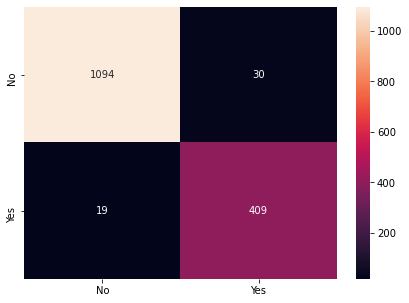

In [73]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [85]:
from sklearn.metrics import classification_report
print('\n', classification_report(y_test, y_pred))


               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1124
           1       0.93      0.96      0.94       428

    accuracy                           0.97      1552
   macro avg       0.96      0.96      0.96      1552
weighted avg       0.97      0.97      0.97      1552



In [74]:
y_test.shape

(1552,)

In [75]:
y_pred.shape

(1552,)

In [76]:
#saving the model
import pickle
f = open('classifier.pickle', 'wb')
pickle.dump(classifier, f)
f.close()

In [77]:
#loading the model
import pickle
f = open('classifier.pickle', 'rb')
cf = pickle.load(f)
f.close()

In [78]:
#saving the vectorization
import pickle
vec_file = 'vectorizer.pickle'
pickle.dump(cv, open(vec_file, 'wb'))
f.close()

In [79]:
#loading the vectorization
import pickle
e = open('vectorizer.pickle', 'rb')
vc = pickle.load(e)
e.close()